In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Cargar los datos desde un archivo CSV
datos = pd.read_csv(r"data\\Client_segment_MODIFICADO.csv", sep=';')

# Mostrar los primeros registros para verificar
datos.head()


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos anuales brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,NaN
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,Avila,"1,767",30,1,299,NaN


In [7]:
# Limpiar los nombres de las columnas
datos.columns = datos.columns.str.strip()

# Verificar nombres de columnas
print(datos.columns)


Index(['ID', 'Genero', 'Casado', 'Edad', 'Graduado', 'Profesion',
       'Experiencia laboral', 'Gastoscore', 'Family_Size', 'anno_nacimiento',
       'Generacion', 'Ingresos anuales brutos', 'Provincia',
       'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Abandono',
       'Dias_cliente', 'Campanna_anno'],
      dtype='object')


In [13]:
# Crear una lista con las columnas categóricas
categoricas = ['Genero', 'Casado', 'Graduado', 'Profesion', 'Gastoscore', 'Generacion', 'Provincia', 'Experiencia laboral']

# Aplicar LabelEncoder a cada columna categórica
label_encoder = LabelEncoder()
for col in categoricas:
    datos[col] = label_encoder.fit_transform(datos[col])

# Verificar datos transformados
datos[categoricas].head()


,Genero,Casado,Graduado,Profesion,Gastoscore,Generacion,Provincia,Experiencia laboral
0,1,0,0,3,1,2,30,2
1,0,1,1,4,2,3,37,0
2,0,1,1,4,1,1,8,0
3,1,1,1,8,0,1,16,0
4,0,1,1,7,0,1,4,0


In [12]:
# Seleccionar columnas relevantes
numericas = ['Edad', 'Ingresos anuales brutos', 'Family_Size', 
             'Digital_encuenta_index', 'Gasto_medio_mensual_cuota', 'Dias_cliente', 'camp_anno']

# Combinar categóricas y numéricas para el modelo
datos_para_modelo = datos[categoricas + numericas]

# Verificar estructura final de datos
datos_para_modelo.head()


KeyError: "['Digital_encuenta_index', 'camp_anno'] not in index"

In [10]:
# Verificar tipos de datos
print(datos_para_modelo.dtypes)

# Verificar valores únicos en cada columna (para detectar texto no esperado)
for col in datos_para_modelo.columns:
    print(f"{col}: {datos_para_modelo[col].unique()[:10]}")  # Muestra los 10 primeros valores únicos


NameError: name 'datos_para_modelo' is not defined

In [11]:
# Reemplazar comas por puntos en todo el DataFrame (si aplica)
datos_para_modelo = datos_para_modelo.replace(',', '.', regex=True)


NameError: name 'datos_para_modelo' is not defined

In [14]:
# Convertir todas las columnas a tipo numérico
for col in datos_para_modelo.columns:
    datos_para_modelo[col] = pd.to_numeric(datos_para_modelo[col], errors='coerce')


In [15]:
# Verificar si hay valores faltantes
print(datos_para_modelo.isnull().sum())

# Opcional: Eliminar filas con valores faltantes
datos_para_modelo = datos_para_modelo.dropna()

# Opcional: Rellenar valores faltantes con la media o mediana
# datos_para_modelo = datos_para_modelo.fillna(datos_para_modelo.mean())


Genero                          0
Casado                          0
Graduado                        0
Profesion                       0
Gastoscore                      0
Generación                      0
Provincia                       0
Experiencia laboral             0
Edad                            0
Ingresos anuales brutos         0
Family_Size                     0
Digital_encuenta_index          0
Gasto_medio_mensual_cuota       0
Dias_cliente                    0
camp_anno                    5707
dtype: int64


In [16]:
# Escalar las variables
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_para_modelo)

# Convertir los datos escalados en un DataFrame para fácil visualización
datos_escalados_df = pd.DataFrame(datos_escalados, columns=datos_para_modelo.columns)
datos_escalados_df.head()


,Genero,Casado,Graduado,Profesion,Gastoscore,Generación,Provincia,Experiencia laboral,Edad,Ingresos anuales brutos,Family_Size,Digital_encuenta_index,Gasto_medio_mensual_cuota,Dias_cliente,camp_anno
0,-1.096194,0.730724,0.729691,0.269436,1.460423,0.944600,0.715460,-0.776436,-0.319880,1.721606,0.161715,-0.364858,-0.536169,0.285166,0.555395
1,-1.096194,0.730724,0.729691,0.269436,-0.152813,-1.576806,-1.286277,-0.776436,1.428845,-0.089533,-1.129724,-0.293968,0.157369,-0.565852,-0.868236
2,0.912247,0.730724,0.729691,1.691280,-1.766048,-1.576806,-0.734074,-0.776436,1.428845,0.716552,-0.484004,0.105288,0.157369,-0.486424,0.555395
3,-1.096194,-1.186909,0.729691,-0.086024,-0.152813,0.944600,0.094231,0.474843,-0.647766,-0.810158,0.161715,-0.366279,-0.536169,1.249654,-0.868236
4,-1.096194,0.730724,0.729691,-1.152407,1.460423,-1.576806,-1.217252,-0.776436,0.718426,1.116257,0.807434,-0.290322,1.197674,0.602880,0.555395


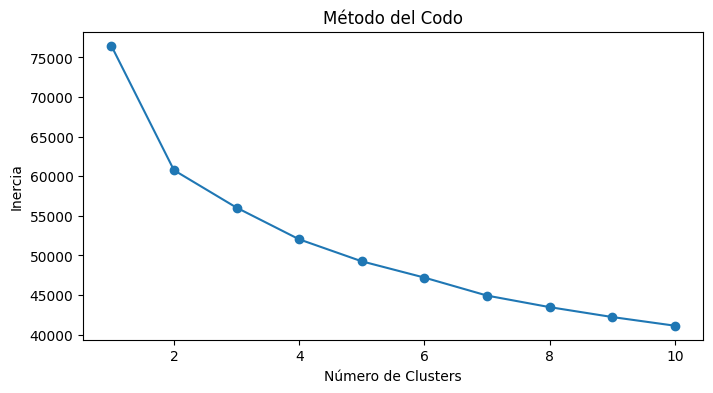

In [17]:
# Método del codo para encontrar el número óptimo de clusters
inercia = []
rango_clusters = range(1, 11)

for k in rango_clusters:
    modelo_kmeans = KMeans(n_clusters=k, random_state=42)
    modelo_kmeans.fit(datos_escalados)
    inercia.append(modelo_kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(rango_clusters, inercia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


In [19]:
print(f"Filas en datos_escalados: {len(datos_escalados)}")
print(f"Filas en clusters: {len(clusters)}")
print(f"Filas en datos: {len(datos)}")


Filas en datos_escalados: 5099
Filas en clusters: 5099
Filas en datos: 10806


In [20]:
# Filtrar el DataFrame original para que coincida con datos_para_modelo
datos_filtrado = datos.loc[datos_para_modelo.index].reset_index(drop=True)

# Ahora asigna los clusters
datos_filtrado['Cluster'] = clusters

# Verifica los resultados
datos_filtrado.head()


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generación,Ingresos anuales brutos,Provincia,Digital_encuenta_index,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,camp_anno,Cluster
0,CLI3,0,1,42,1,4,0,2,3,1982,4,118107,35,179,30,0,455,3,1
1,CLI4,0,1,74,1,4,0,1,1,1950,0,53533,6,1326,50,0,380,1,3
2,CLI5,1,1,74,1,8,0,0,2,1950,0,82273,14,7786,50,1,387,3,3
3,CLI9,0,0,36,1,3,1,1,3,1988,4,27840,26,156,30,0,540,1,0
4,CLI11,0,1,61,1,0,0,2,4,1963,0,96524,7,1385,80,0,483,3,1


In [21]:
# Revisar si datos_para_modelo perdió filas
print(datos.shape)  # Filas y columnas originales
print(datos_para_modelo.shape)  # Filas y columnas procesadas


(10806, 18)
(5099, 15)


In [23]:
# Filtrar el DataFrame original según el índice de datos_para_modelo
datos_filtrado = datos.loc[datos_para_modelo.index].reset_index(drop=True)

# Verifica que ahora tienen el mismo número de filas
print(f"Filas en datos_filtrado: {len(datos_filtrado)}")
print(f"Filas en datos_para_modelo: {len(datos_para_modelo)}")


Filas en datos_filtrado: 5099
Filas en datos_para_modelo: 5099


In [24]:
# Asignar los clusters al DataFrame filtrado
datos_filtrado['Cluster'] = clusters

# Verificar que los clusters se hayan añadido correctamente
print(datos_filtrado.head())


      ID  Genero  Casado  Edad  Graduado  Profesion  Experiencia laboral  \
0   CLI3       0       1    42         1          4                    0   
1   CLI4       0       1    74         1          4                    0   
2   CLI5       1       1    74         1          8                    0   
3   CLI9       0       0    36         1          3                    1   
4  CLI11       0       1    61         1          0                    0   

   Gastoscore  Family_Size  anno_nacimiento  Generación  \
0           2            3             1982           4   
1           1            1             1950           0   
2           0            2             1950           0   
3           1            3             1988           4   
4           2            4             1963           0   

   Ingresos anuales brutos  Provincia  Digital_encuenta_index  \
0                   118107         35                     179   
1                    53533          6                    1

In [25]:
# Verificar valores nulos en datos_para_modelo
print(datos_para_modelo.isnull().sum())

# Sincronizar eliminando las mismas filas en datos
datos_filtrado = datos.loc[datos_para_modelo.dropna().index]


Genero                       0
Casado                       0
Graduado                     0
Profesion                    0
Gastoscore                   0
Generación                   0
Provincia                    0
Experiencia laboral          0
Edad                         0
Ingresos anuales brutos      0
Family_Size                  0
Digital_encuenta_index       0
Gasto_medio_mensual_cuota    0
Dias_cliente                 0
camp_anno                    0
dtype: int64


In [26]:
# Reindexar para asegurar alineación
datos_para_modelo = datos_para_modelo.reset_index(drop=True)
datos = datos.reset_index(drop=True)


In [27]:
print(f"Filas en datos_filtrado: {len(datos_filtrado)}")
print(f"Filas en clusters: {len(clusters)}")


Filas en datos_filtrado: 5099
Filas en clusters: 5099


In [29]:
# Sincronizar el DataFrame original con los datos procesados (escalados)
datos_filtrado = datos.loc[datos_para_modelo.index].reset_index(drop=True)


In [47]:
# Elige el número de clusters
n_clusters = 6 # Cambia este valor si el gráfico del codo indica otro óptimo

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(datos_escalados)

# Añadir los clusters al DataFrame sincronizado
datos_filtrado['Cluster'] = clusters

# Verificar los resultados
print(datos_filtrado.head())


     ID  Genero  Casado  Edad  Graduado  Profesion  Experiencia laboral  \
0  CLI2       1       0    24         0          3                    2   
1  CLI3       0       1    42         1          4                    0   
2  CLI4       0       1    74         1          4                    0   
3  CLI5       1       1    74         1          8                    0   
4  CLI6       0       1    44         1          7                    0   

   Gastoscore  Family_Size  anno_nacimiento  Generación  \
0           1            4             2000           4   
1           2            3             1982           4   
2           1            1             1950           0   
3           0            2             1950           0   
4           0            6             1980           2   

   Ingresos anuales brutos  Provincia  Digital_encuenta_index  \
0                    13945         30                    1029   
1                   118107         35                     179   

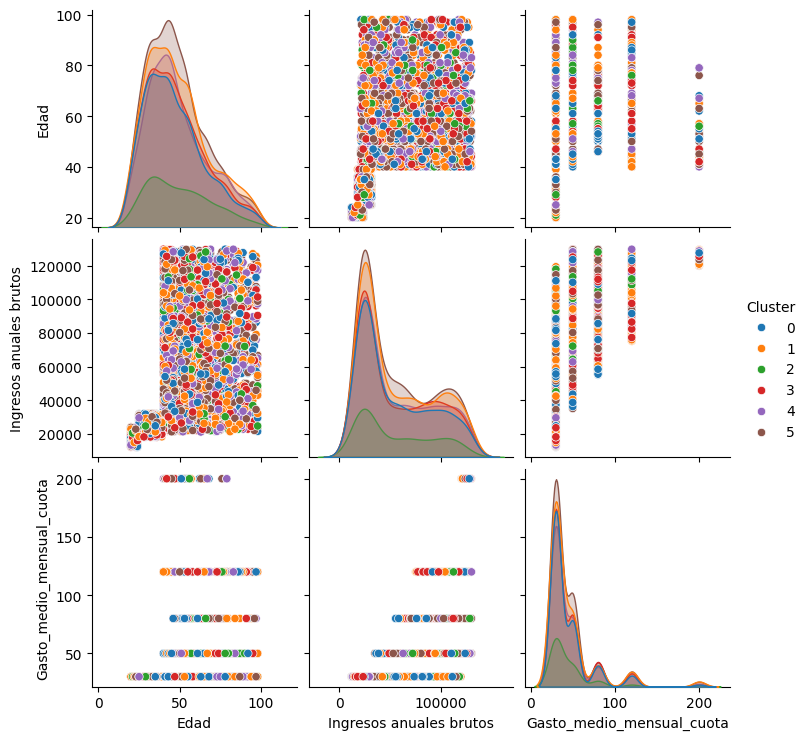

In [48]:
# Visualización con pairplot (puedes elegir las columnas clave)
sns.pairplot(datos_filtrado[['Edad', 'Ingresos anuales brutos', 'Gasto_medio_mensual_cuota', 'Cluster']], 
             hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()



Cluster
5    1122
1    1048
3     894
4     889
0     844
2     302
Name: count, dtype: int64


C:\Users\nacho\AppData\Local\Temp\ipykernel_7272\1799340723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribucion_clusters.index, y=distribucion_clusters.values, palette='viridis')


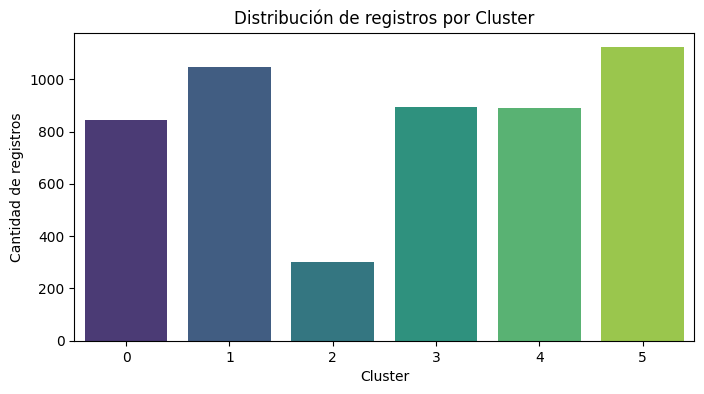

In [49]:
# Conteo de registros por cluster
distribucion_clusters = datos_filtrado['Cluster'].value_counts()
print(distribucion_clusters)

# Visualización
plt.figure(figsize=(8, 4))
sns.barplot(x=distribucion_clusters.index, y=distribucion_clusters.values, palette='viridis')
plt.title("Distribución de registros por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de registros")
plt.show()



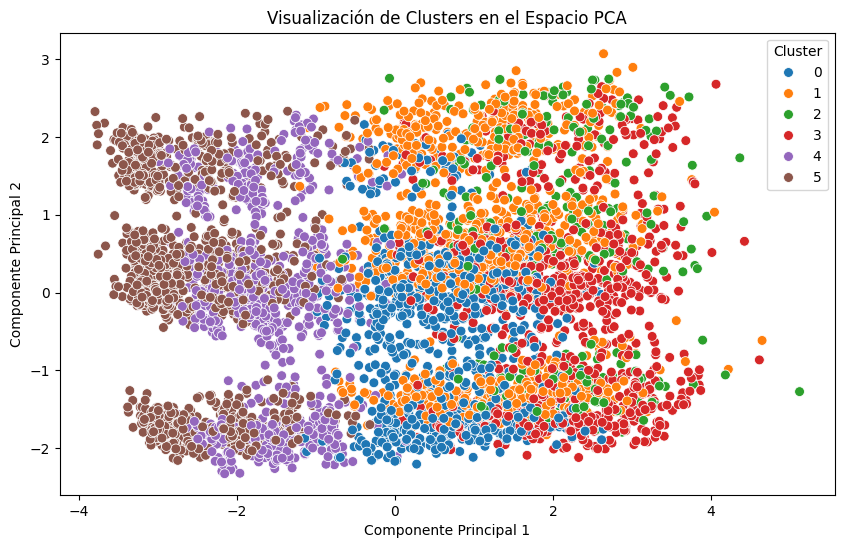

In [50]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=datos_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = datos_filtrado['Cluster']

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50)
plt.title("Visualización de Clusters en el Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.show()


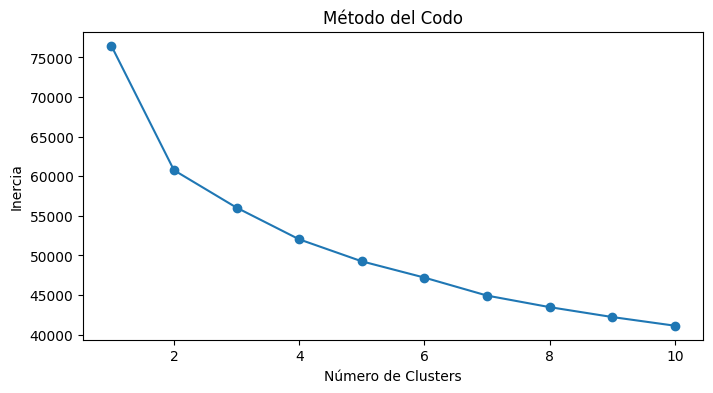

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes valores de K
inercia = []
rango_clusters = range(1, 11)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)
    inercia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(rango_clusters, inercia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


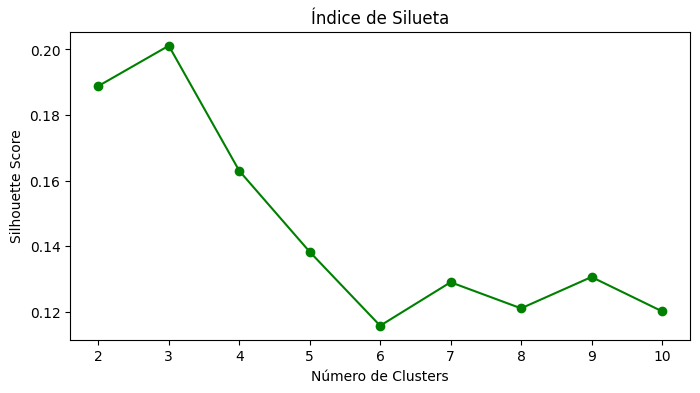

In [52]:
from sklearn.metrics import silhouette_score

# Calcular el índice de silueta para diferentes valores de K
silhouette_scores = []
rango_clusters = range(2, 11)  # El índice de silueta no se calcula para k=1
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(datos_escalados)
    score = silhouette_score(datos_escalados, clusters)
    silhouette_scores.append(score)

# Visualizar el índice de silueta
plt.figure(figsize=(8, 4))
plt.plot(rango_clusters, silhouette_scores, marker='o', color='green')
plt.title("Índice de Silueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()


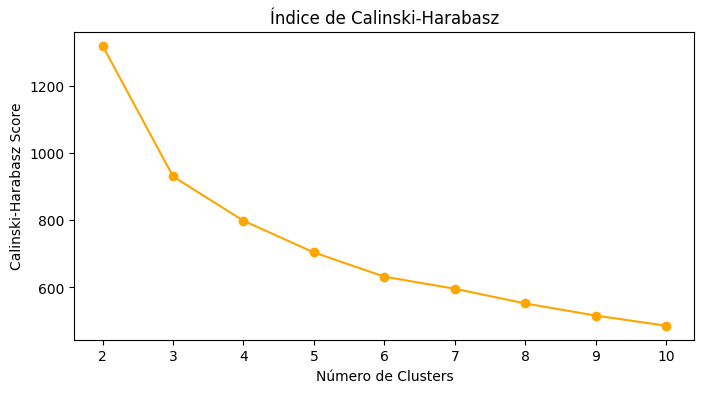

In [53]:
from sklearn.metrics import calinski_harabasz_score

# Calcular el índice de Calinski-Harabasz para diferentes valores de K
calinski_scores = []
rango_clusters = range(2, 11)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(datos_escalados)
    score = calinski_harabasz_score(datos_escalados, clusters)
    calinski_scores.append(score)

# Visualizar el índice de Calinski-Harabasz
plt.figure(figsize=(8, 4))
plt.plot(rango_clusters, calinski_scores, marker='o', color='orange')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()


Índice de Silueta Global: 0.12


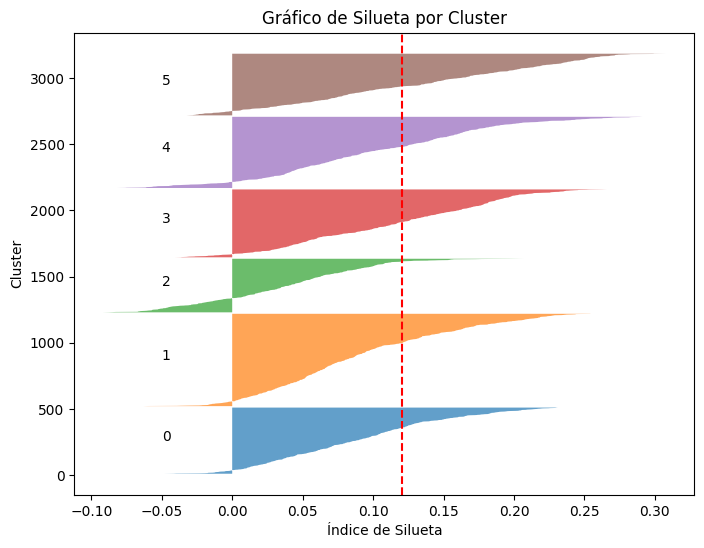

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Calcular las muestras del índice de silueta para cada punto
silhouette_vals = silhouette_samples(datos_escalados, clusters)

# Promedio del índice de silueta global
silhouette_avg = silhouette_score(datos_escalados, clusters)
print(f"Índice de Silueta Global: {silhouette_avg:.2f}")

# Gráfico del índice de silueta por cluster
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_vals = silhouette_vals[clusters == i]
    cluster_vals.sort()
    y_upper = y_lower + len(cluster_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_vals), str(i))
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de Silueta por Cluster")
plt.xlabel("Índice de Silueta")
plt.ylabel("Cluster")
plt.show()
